In [256]:
import pandas as pd
import json
from easonsi import utils
from collections import defaultdict
import matplotlib.pyplot as plt

In [257]:
dpath  = 'C:/Users/liuweican/人民网比赛/raw_data/train.csv'
df = pd.read_csv(dpath,  sep='\t', encoding="utf-8")
print(df.head())

   ID                                               Text         Label
0   0   原来是这样啊，又是一个新的道理，简直让我长知识了，七星连珠是很难得的一种现象，这个解析也太到位了  label_878402
1   1   老师好厉害，咱就是说，老师，能不能，就是，研究一下能不能穿越🙏 代入感很强，我已经想穿越去...  label_878402
2   2  这个七星连珠的现象居然真的存在，我只在小说上面看过，太神奇了吧，至于其他的我也不太懂，科学现...  label_878402
3   3        应该听过张老师讲，这一个的人都会觉得特别的清晰吧，而且也明白七星连珠不会引发危害。 ​  label_878402
4   4                七星连珠这不是应该是天文知识吗，怎么物理也可以，学霸的世界我果然不懂啊  label_878402


In [258]:
def transfer_to_json(df,out_path):
    fw = open(out_path, 'w', encoding='utf-8')
    for i in range(len(df)):
        l = {}
        l["id"] = int(df.iloc[i,0])
        l["text"] = df.iloc[i,1]
        l["label"] = df.iloc[i,2].split("，")
        l = json.dumps(l, ensure_ascii=False)
        fw.write(l + '\n')
    fw.close()

In [259]:
transfer_to_json(df,"C:/Users/liuweican/人民网比赛/train.json")

In [260]:
data = utils.LoadJsonl("C:/Users/liuweican/人民网比赛/train.json")

In [261]:
print("样本条数：",len(data))

样本条数： 77314


In [262]:
categories = set()
for d in data:
    for label in d['label']:
        categories.add(label)

In [263]:
print("标签个数：",len(categories))

标签个数： 1399


In [264]:
def count(data):
    text_len_list = []
    label_count_list = []
    for d in data:
        text = d['text']
        label = d['label']
        text_len_list.append(len(text))
        label_count_list.append(len(label))
      
    return text_len_list,label_count_list
    #return sum(text_len_list)/len(text_len_list),max(text_len_list), sum(label_count_list)/len(label_count_list),max(label_count_list)

In [265]:
text_len_list,label_count_list = count(data)

文本长度信息

In [266]:
print("文本平均长度：",sum(text_len_list)/len(text_len_list))

文本平均长度： 55.01827612075433


In [267]:
print("最长文本长度：",max(text_len_list))

最长文本长度： 271


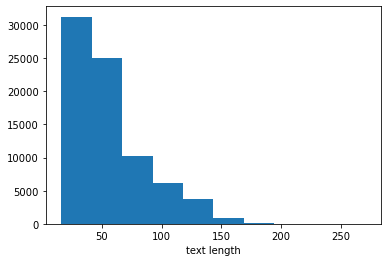

In [268]:
plt.hist(text_len_list)
plt.xlabel('text length')
plt.show()

单个样本的标签信息

In [269]:
print('平均样本标签数：',sum(label_count_list)/len(label_count_list))

平均样本标签数： 1.51751299893939


In [270]:
print('最大样本标签数：',max(label_count_list))

最大样本标签数： 8


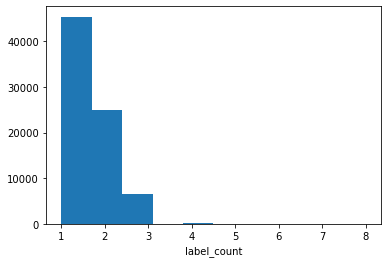

In [271]:
plt.hist(label_count_list)
plt.xlabel('label_count')
plt.show()

单个标签类别信息

In [272]:
def label_dis(data):
    res = defaultdict(int)
    for d in data:
        for label in d['label']:
            res[label] += 1
    return res

In [273]:
label_count = label_dis(data)

In [274]:
sorted(label_count.items(), key=lambda x : x[1],reverse=True)

[('label_1191241', 10235),
 ('label_1008181', 10023),
 ('label_1281707', 4680),
 ('label_1515062', 4671),
 ('label_472394', 4671),
 ('label_742793', 2783),
 ('label_1411524', 1906),
 ('label_1265038', 1881),
 ('label_896157', 1730),
 ('label_1064693', 1719),
 ('label_467023', 1641),
 ('label_1474127', 1421),
 ('label_1227838', 1066),
 ('label_1166118', 1066),
 ('label_19479', 1060),
 ('label_287908', 828),
 ('label_753343', 719),
 ('label_1056127', 716),
 ('label_529001', 711),
 ('label_512340', 704),
 ('label_1438711', 695),
 ('label_313744', 675),
 ('label_1517029', 652),
 ('label_408651', 618),
 ('label_167080', 607),
 ('label_727417', 588),
 ('label_82331', 585),
 ('label_16631', 491),
 ('label_480366', 489),
 ('label_1182442', 486),
 ('label_197715', 482),
 ('label_1319820', 477),
 ('label_432046', 461),
 ('label_238628', 454),
 ('label_648491', 437),
 ('label_1463330', 434),
 ('label_1055138', 413),
 ('label_1254017', 413),
 ('label_635234', 412),
 ('label_1279907', 412),
 ('labe

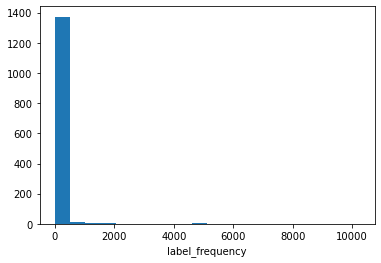

In [275]:
plt.hist(label_count.values(),bins=20)
plt.xlabel('label_frequency')
plt.show()

In [276]:
#去掉出现次数>1000的标签
label=[]
value=[]
for l,v in label_count.items():
    if v<1000: 
        label.append(l)
        value.append(v)
new_label_count=dict(zip(label,value))

In [277]:
sorted(new_label_count.items(), key=lambda x : x[1],reverse=True)

[('label_287908', 828),
 ('label_753343', 719),
 ('label_1056127', 716),
 ('label_529001', 711),
 ('label_512340', 704),
 ('label_1438711', 695),
 ('label_313744', 675),
 ('label_1517029', 652),
 ('label_408651', 618),
 ('label_167080', 607),
 ('label_727417', 588),
 ('label_82331', 585),
 ('label_16631', 491),
 ('label_480366', 489),
 ('label_1182442', 486),
 ('label_197715', 482),
 ('label_1319820', 477),
 ('label_432046', 461),
 ('label_238628', 454),
 ('label_648491', 437),
 ('label_1463330', 434),
 ('label_1055138', 413),
 ('label_1254017', 413),
 ('label_635234', 412),
 ('label_1279907', 412),
 ('label_1489598', 403),
 ('label_173876', 403),
 ('label_249715', 401),
 ('label_396610', 398),
 ('label_415546', 388),
 ('label_1005240', 374),
 ('label_505902', 341),
 ('label_1368268', 334),
 ('label_878402', 330),
 ('label_1226168', 325),
 ('label_304', 325),
 ('label_98029', 325),
 ('label_1548', 324),
 ('label_575306', 324),
 ('label_1313183', 320),
 ('label_1176064', 320),
 ('label_

In [278]:
def target_label_count(new_lable_count,func):
  res=0
  for l,v in new_label_count.items():
        if func(v):
            res+=1
  return res

In [279]:
print('出现次数为1的标签个数：',target_label_count(new_label_count,lambda x:x==1))
print('出现次数>2的标签个数：',target_label_count(new_label_count,lambda x:x>2))
print('出现次数>5的标签个数：',target_label_count(new_label_count,lambda x:x>5))
print('出现次数>10的标签个数：',target_label_count(new_label_count,lambda x:x>10))
print('出现次数>20的标签个数：',target_label_count(new_label_count,lambda x:x>20))

出现次数为1的标签个数： 6
出现次数>2的标签个数： 1374
出现次数>5的标签个数： 1332
出现次数>10的标签个数： 1060
出现次数>20的标签个数： 605


对于样本个数为10-100的标签进行观察，猜测其标签语义（观察、举例）

In [280]:
#10-100
label=[]
for l,v in label_count.items():
    if 10<=v<100: 
        label.append(l)
len(label)

989

In [281]:
#举例观察
l=label[32]
print('标签：',l)
print('对应样本个数：',label_count[l])
print('对应样本texts：')
for d in data:
    for ll in d['label']:
        if l==ll:
            print(d['text'])


标签： label_885654
对应样本个数： 27
对应样本texts：
 【上海石化火灾目前未发现对周边水体环境造成影响，已有1人死亡】 🙏🙏🙏 上海石化火灾目前未发现对周边水体环境造成影响，已有1人死亡 澎湃新闻的微博视频 ​
【上海石化火灾未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。上海石化火灾未发现对周边水体环境造成影响，已有1人死亡 ...全文
【上海石化火灾目前未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 ...全文
【】据@上海石化在线 经初步核实，目前事故导致上海石化一名员工手臂轻微擦伤，一名第三方运输车辆驾驶员死亡，具体原因正在进一步调查。 ​​​​ ​
【化工企业消防安全常识】化工企业消防安全工作如何做？该注意哪些问题？戳图学习 ​ ​​​
【，目前未发现对周边水体环境造成影响】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 澎湃新闻的微博视频 ​​​
【上海石化火灾未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 澎湃新闻的微博视频
不幸中的万幸是：金山石化爆炸的是只是乙二醇，而不是氯气。需要了解的自救常识。   ​​​
【上海石化火灾未发现对周边水体环境造成影响，已有1人死亡】6月18日清晨，位于上海金山的中石化上海石化乙二醇装置区域发生火灾。据新华网经初步了解，火灾已造成1人死亡。目前，未发现对周边水体环境造成影响。 澎湃新闻的微博视频 ...全文
【别再疏忽大意～工厂防火安全注意啥？】消防安全，责任重于泰山！ 消防部门提醒：夏天到了，各企业要注意，厂房、仓库等防火不容忽视！ 江西消防的微博视频
【 目前正在实施保护性燃烧】6月18日，。目前，现场火势已经得到控制，正在实施保护性燃烧。经初步核实，火灾已造成一名第三方运输

将标签按频率排序，统一构建顺序并保存为文件，后续都使用同一编号

In [282]:
sorted_label_count=sorted(label_count.items(), key=lambda x : x[1],reverse=True)
all_labels=[]
for i in sorted_label_count:
    all_labels.append(i[0])
all_labels

['label_1191241',
 'label_1008181',
 'label_1281707',
 'label_1515062',
 'label_472394',
 'label_742793',
 'label_1411524',
 'label_1265038',
 'label_896157',
 'label_1064693',
 'label_467023',
 'label_1474127',
 'label_1227838',
 'label_1166118',
 'label_19479',
 'label_287908',
 'label_753343',
 'label_1056127',
 'label_529001',
 'label_512340',
 'label_1438711',
 'label_313744',
 'label_1517029',
 'label_408651',
 'label_167080',
 'label_727417',
 'label_82331',
 'label_16631',
 'label_480366',
 'label_1182442',
 'label_197715',
 'label_1319820',
 'label_432046',
 'label_238628',
 'label_648491',
 'label_1463330',
 'label_1055138',
 'label_1254017',
 'label_635234',
 'label_1279907',
 'label_1489598',
 'label_173876',
 'label_249715',
 'label_396610',
 'label_415546',
 'label_1005240',
 'label_505902',
 'label_1368268',
 'label_878402',
 'label_1226168',
 'label_304',
 'label_98029',
 'label_1548',
 'label_575306',
 'label_1313183',
 'label_1176064',
 'label_24052',
 'label_980197',

In [283]:
import ljqpy
tokenlist=TokenList('Tokenlist.csv',1,label_count,lambda x:x[1],1,all_labels)